# HEALTHCARE PROBLEM - STROKE PREDICTION

Objective :- Predict whether a person will have stroke or not based on some given attributes.

In [1]:
# Understand the data :-

# Here is the Definitions of the columns of the data

# 1.) id-Patient ID

# 2.) gender-Gender of Patient

# 3.) age-Age of Patient

# 4.) hypertension-0 - no hypertension, 1 - suffering from hypertension

# 5.) heart_disease-0 - no heart disease, 1 - suffering from heart disease

# 6.) ever_married-Yes/No

# 7.) work_type-Type of occupation

# 8.) Residence_type-Area type of residence (Urban/ Rural)

# 9.) avg_glucose_level-Average Glucose level (measured after meal)

# 10.) bmi-Body mass index

# 11.) smoking_status-patient’s smoking status

# 12.) stroke-0 - no stroke, 1 - suffered stroke

In [2]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Loading the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# checking shape of data
df.shape

(5110, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
# Checking of Null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Therefore, there are null values present in 'bmi' feature of data.

In [9]:
df[df['bmi']>70].stroke

544     0
928     0
2128    0
4209    0
Name: stroke, dtype: int64

From above we can clearly see that, the person with higher bmi is not neccessary will be having stroke.

In [10]:
df = df.drop('id',axis=1) # since it is of no use

In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [13]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [14]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [15]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [16]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [129]:
df['Residence_type'].value_counts()

1    2596
0    2514
Name: Residence_type, dtype: int64

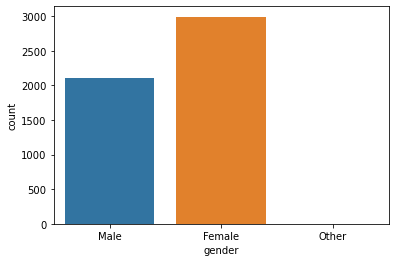

In [17]:
sns.countplot(df['gender'])

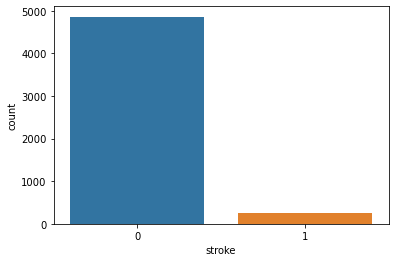

In [18]:
sns.countplot(df['stroke'])

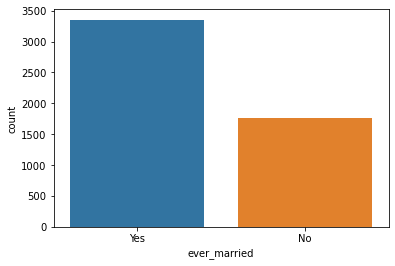

In [19]:
sns.countplot(df['ever_married'])

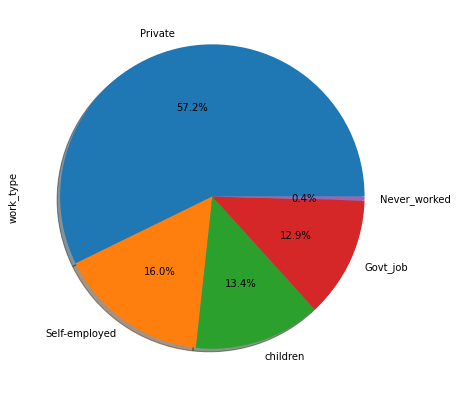

In [20]:
fig = plt.figure(figsize=(10,7))
(df['work_type'].value_counts()).plot.pie(shadow=True,autopct='%1.1f%%')

Therefore we can see that majority of people are working in private sector

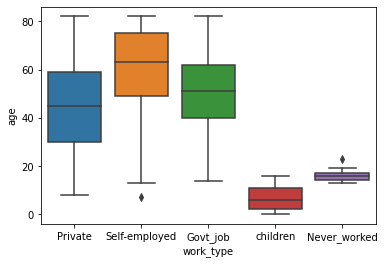

In [21]:
sns.boxplot(x='work_type',y='age',data=df)

In [22]:
# There are outliers present in 'self-employed' and 'Never_worked' features (outliers are represented by dot).
# From the above boxplot we can say that, majority of people having age above 60 works in private sector and people haveing age
# around 18 to 50 are self employed.

In [23]:
# affect of all factors on stroke
print(df.pivot_table(index = 'heart_disease', values='stroke',aggfunc = ('mean','count')))

                count      mean
heart_disease                  
0              4834.0  0.041787
1               276.0  0.170290


From above we can say that 4% people have chances of getting stroke if they don't have heart disease.
While there 17% people have chances of getting stroke if they have heart disease.

In [24]:
print(df.pivot_table(index = 'work_type', values='stroke',aggfunc = ('mean','count')))

                count      mean
work_type                      
Govt_job        657.0  0.050228
Never_worked     22.0  0.000000
Private        2925.0  0.050940
Self-employed   819.0  0.079365
children        687.0  0.002911


If person is self employee , there are more chances of getting stroke.

In [25]:
print(df.pivot_table(index = 'ever_married', values='stroke',aggfunc = ('mean','count')))

               count      mean
ever_married                  
No            1757.0  0.016505
Yes           3353.0  0.065613


Therefore, there are 6% chance of person of getting stroke if he/she is married/

In [26]:
print(df.pivot_table(index = 'smoking_status', values='stroke',aggfunc = ('mean','count')))

                  count      mean
smoking_status                   
Unknown          1544.0  0.030440
formerly smoked   885.0  0.079096
never smoked     1892.0  0.047569
smokes            789.0  0.053232


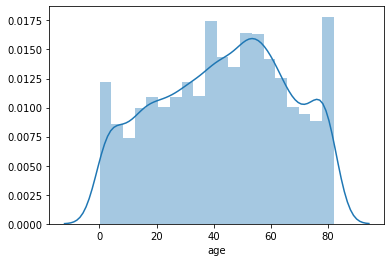

In [27]:
sns.distplot(df.age, bins=20)

Therefore mean age of people are arounf 55 to 60 yrs.

Text(0, 0.5, 'Count Strokes')

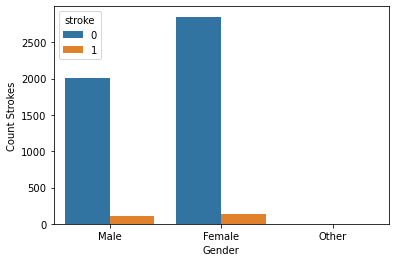

In [29]:
plt.figure()
ax = sns.countplot(df['gender'],hue=df['stroke'])
plt.xlabel('Gender')
plt.ylabel('Count Strokes')

Therefore chances of female are less of getting stroke in comparison to males.

Text(0, 0.5, 'stroke')

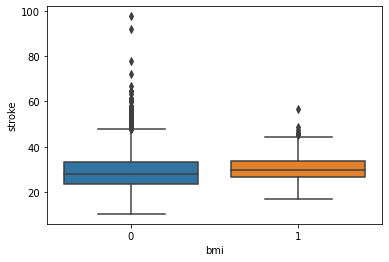

In [31]:
# affect of bmi on heart attacks
plt.figure()
ax = sns.boxplot(df['stroke'],df['bmi'])
plt.xlabel('bmi')
plt.ylabel('stroke')

Text(0, 0.5, 'stroke')

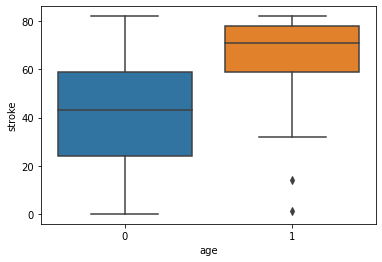

In [32]:
# affect of age on heart attacks
plt.figure()
ax = sns.boxplot(df['stroke'],df['age'])
plt.xlabel('age')
plt.ylabel('stroke')

Therefore of chance of getting stroke are more for aged people.

Text(0, 0.5, 'stroke')

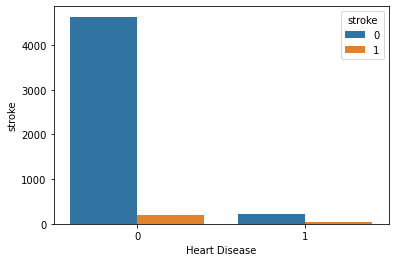

In [33]:
# how pre existing heart condition affect stroke
plt.figure()
ax = sns.countplot(df['heart_disease'],hue=df['stroke'])
plt.xlabel('Heart Disease')
plt.ylabel('stroke')

Therefore chances of people of getting stroke is more if they have already heart disease.

# Filling missing values

In [34]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [35]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

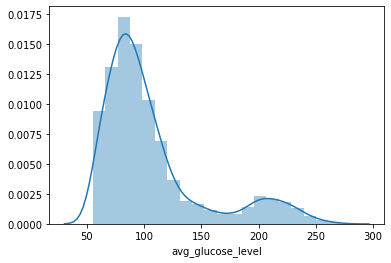

In [36]:
sns.distplot(df['avg_glucose_level'],bins=20)

The avg glucose level of dataset is skewed to the left which means more people have lower glucose level in the dataset than the average. And also as you can guess higher glucose level bears a correlation to heart diseases.

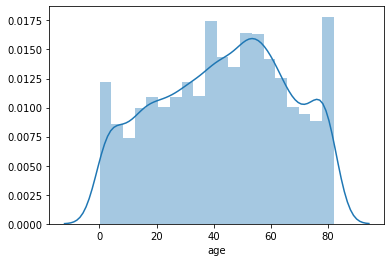

In [42]:
sns.distplot(df['age'],bins=20)

Average age of people is around 55 to 60 yrs.

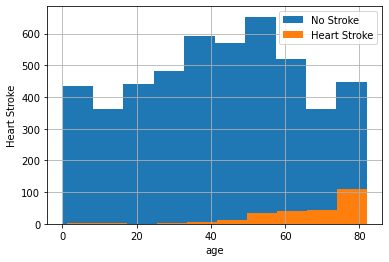

In [43]:
# Chance of stroke increases with increase in Age
df.loc[df['stroke'] == 0, 'age'].hist(label='No Stroke')
df.loc[df['stroke'] == 1, 'age'].hist(label='Heart Stroke')
plt.xlabel('age')
plt.ylabel('Heart Stroke')
plt.legend()

Therefore chances of getting heart stroke increase as age increases.

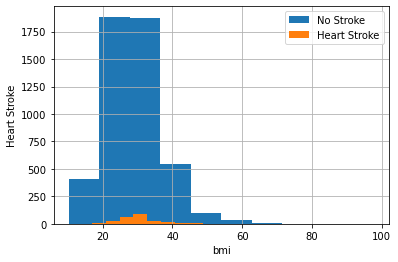

In [44]:
df.loc[df['stroke'] == 0, 'bmi'].hist(label='No Stroke')
df.loc[df['stroke'] == 1, 'bmi'].hist(label='Heart Stroke')
plt.xlabel('bmi')
plt.ylabel('Heart Stroke')
plt.legend()

From above it is very clear that it is not necessary that if a person is having high bmi then his chances will be more of
getting stroke.

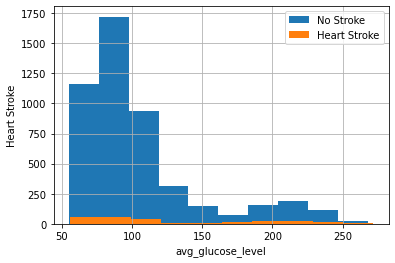

In [45]:
df.loc[df['stroke'] == 0, 'avg_glucose_level'].hist(label='No Stroke')
df.loc[df['stroke'] == 1, 'avg_glucose_level'].hist(label='Heart Stroke')
plt.xlabel('avg_glucose_level')
plt.ylabel('Heart Stroke')
plt.legend()

Chances of getting stroke is high with glucose level in range of 70-100

In [40]:
df['smoking_status'].fillna(df['smoking_status'].mode()[0],inplace=True)

In [41]:
# checking if there is nay null value present
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

There is no null value present in the data.

# Feature Engineering :-

In [46]:
# Encoding categorical variable
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

for i in df.columns:
    if isinstance(df[i][0], str):
        df[i] =encoder.fit_transform(df[i])

In [47]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [48]:
df['work_type'].unique()

array([2, 3, 0, 4, 1])

In [127]:
df['work_type'].value_counts()

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

In [130]:
df['smoking_status'].value_counts()

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

In [49]:
# Standardizing the dataset using standard scaler
# The StandardScaler assumes your data is normally distributed within each feature such that the distribution is now centered
# around 0, with a standard deviation of 1
# Main idea is to normalize your data.
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

scalar.fit(df)
scaled_data = scalar.transform(df)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [51]:
# Now see first few rows of the dataset
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


In [52]:
# Preparing data for our model
X = df.drop('stroke',axis=1)
X.shape

(5110, 10)

In [53]:
y = df['stroke']

In [54]:
y.shape

(5110,)

# Building the model

# Logistics Regression Model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1000)
# we can use any number in random_state, it is just for every time we run our model our results should remain same.

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3577, 10)
(3577,)
(1533, 10)
(1533,)


In [57]:
log = LogisticRegression()

In [58]:
log.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
log.score(X_train,y_train) # this is our training accuracy

0.9530332681017613

In [60]:
# This clearly shows that model is overfit or is only considering the values which is higher in number. We need to balance the
# data which could be done in 2 ways either we can undersample the data by dropping the values or oversample using SMOTE.
# Three models i.e. Logistics Regression, Decision Tree and Random Forest Regression will be created after undersampling
# confusion matrix for each models will be displayed at the end.

In [61]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# To retain the original dataset. we created a copy of the dataset.

In [62]:
df_copy = df.copy()

In [63]:
df_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [65]:
# Creating a list of data values which are more in number to make a balanced data.
li = list(df_copy[df_copy.stroke==0].sample(n=5000,replace=True).index) # replacing the data with more balance data

In [66]:
df_copy = df_copy.drop(df_copy.index[li])
df_copy['stroke'].value_counts() # now we can see more balanced dataset compare to previous one

0    1726
1     249
Name: stroke, dtype: int64

In [68]:
X_drop = df_copy.drop('stroke',axis=1)
X_drop.shape

(1975, 10)

In [69]:
y_drop = df_copy.stroke
y_drop.shape

(1975,)

In [70]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_drop, y_drop,test_size=.3,random_state=1000)

In [71]:
# Creating a logistics regression model for our data
log.fit(X_train1, y_train1)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
log.score(X_train1, y_train1)

0.874095513748191

Now the accuracy has dropped.

In [73]:
# Predicting output with logistics regression
y_pred1 = log.predict(X_test1)

In [74]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [76]:
# Classification Report
# now we have 87% accuracy which is better than previous
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, confusion_matrix
print('The accuracy score of model is: ', accuracy_score(y_test1, y_pred1)*100)
print('The f1 score of model is: ', f1_score(y_test1,y_pred1)*100)
print('The recall score of model is: ',recall_score(y_test1,y_pred1)*100)
print('The confusion matrix of model is: ',confusion_matrix(y_test1,y_pred1))
print('\n', classification_report(y_test1,y_pred1))

The accuracy score of model is:  87.18381112984824
The f1 score of model is:  20.833333333333336
The recall score of model is:  12.658227848101266
The confusion matrix of model is:  [[507   7]
 [ 69  10]]

               precision    recall  f1-score   support

           0       0.88      0.99      0.93       514
           1       0.59      0.13      0.21        79

   micro avg       0.87      0.87      0.87       593
   macro avg       0.73      0.56      0.57       593
weighted avg       0.84      0.87      0.83       593



# Decision Tree

In [77]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [78]:
model.fit(X_train1, y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
# Tuning the model using criterion and max_depth only
from sklearn.model_selection import GridSearchCV
param = {'criterion':['entropy','gini'],'max_depth':[2,3,4,5]}
grid_svc = GridSearchCV(model, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(X_train1, y_train1)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [110]:
grid_svc.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [111]:
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train1, y_train1)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [112]:
model.score(X_train1, y_train1)

0.8900144717800289

In [113]:
y_pred_DT = model.predict(X_test1)

In [114]:
# Classification report
print('The accuracy score of model is: ', accuracy_score(y_test1, y_pred_DT)*100)
print('The f1 score of model is: ', f1_score(y_test1,y_pred_DT)*100)
print('The recall score of model is: ',recall_score(y_test1,y_pred_DT)*100)
print('The confusion matrix of model is: ',confusion_matrix(y_test1,y_pred_DT))
print('\n', classification_report(y_test1,y_pred_DT))

The accuracy score of model is:  87.01517706576728
The f1 score of model is:  15.384615384615383
The recall score of model is:  8.860759493670885
The confusion matrix of model is:  [[509   5]
 [ 72   7]]

               precision    recall  f1-score   support

           0       0.88      0.99      0.93       514
           1       0.58      0.09      0.15        79

   micro avg       0.87      0.87      0.87       593
   macro avg       0.73      0.54      0.54       593
weighted avg       0.84      0.87      0.83       593



# Random Forest

In [89]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()

In [91]:
rf.fit(X_train1, y_train1)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Tuning the model using criterion, n_estimators, bootstrap and max_depth

In [92]:
{'criterion':['entropy','gini'], 'n_estimators':[10,20,30,40,50], 'bootstrap':['True','False'], 'max_depth':[2,3,4,5]}
GridSearchCV(rf, param_grid = param,scoring='accuracy',cv=10)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [93]:
grid_svc.fit(X_train1, y_train1)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [94]:
grid_svc.fit(X_train1, y_train1)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [95]:
grid_svc.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [102]:
rf = ensemble.RandomForestClassifier(bootstrap='True', criterion = 'entropy',max_depth=4, n_estimators=500)

In [103]:
rf.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap='True', class_weight=None,
            criterion='entropy', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [104]:
# checking the accuracy score
rf.score(X_train1, y_train1)

0.877713458755427

In [105]:
# predicting the values through random forest
y_pred_rf = rf.predict(X_test1)

In [106]:
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [115]:
# Classification Report
print('The accuracy score of model is: ', accuracy_score(y_test1, y_pred_rf)*100)
print('The f1 score of model is: ', f1_score(y_test1,y_pred_rf)*100)
print('The recall score of model is: ',recall_score(y_test1,y_pred_rf)*100)
print('The confusion matrix of model is: \n',confusion_matrix(y_test1,y_pred_rf))
print('\n', classification_report(y_test1,y_pred_rf))

The accuracy score of model is:  86.84654300168634
The f1 score of model is:  2.5
The recall score of model is:  1.2658227848101267
The confusion matrix of model is: 
 [[514   0]
 [ 78   1]]

               precision    recall  f1-score   support

           0       0.87      1.00      0.93       514
           1       1.00      0.01      0.02        79

   micro avg       0.87      0.87      0.87       593
   macro avg       0.93      0.51      0.48       593
weighted avg       0.89      0.87      0.81       593



In [117]:
# Here we will not comapre our model on the basis of 'precison' like we did in other model because this healthcare problem and
# if by mistake we predict a person no stroke but he/she may have stroke, due to which he may die.
# Thats why in this type of problem we think about 'recall' and if our 'recall will be low' our model is good !!

'f1-score' is combination of both 'precision' and 'recall'. Therefore, if 'f1-score' is high our model is good !!

Therefore, we will be using Decision Tree Classifier as our model.

# Saving our model using pickle

In [118]:
# Pickle
import pickle

In [119]:
# svae model
pickle.dump(model, open('model.pkl','wb'))

In [121]:
# load model
stroke_prediction_model = pickle.load(open('model.pkl','rb'))

In [122]:
# predict the output
y_pred = stroke_prediction_model.predict(X_test1)

In [123]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [125]:
# confusion matrix
print('Confusion matrix of Decison Tree model:- \n', confusion_matrix(y_test1,y_pred))

Confusion matrix of Decison Tree model:- 
 [[509   5]
 [ 72   7]]


In [126]:
# print the accuracy
print('Accuracy of our model is:- ',accuracy_score(y_test1,y_pred))

Accuracy of our model is:-  0.8701517706576728


End